# Model Evaluation

## Parameters

In [1]:
import pandas as pd
import numpy
from scipy.stats import binom

In [2]:
url = ('https://github.com/dhesse/IN-STK5000-Autumn21'
       '/raw/main/compas-scores-two-years.csv.gz')
data = pd.read_csv(url)

In [3]:
data

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [4]:
data.groupby('age_cat')['two_year_recid'].mean()

age_cat
25 - 45            0.459723
Greater than 45    0.315990
Less than 25       0.565075
Name: two_year_recid, dtype: float64

In [6]:
# one bootstrap sample
data.sample(data.shape[0], replace=True)\
  .groupby('age_cat')['two_year_recid'].mean()

age_cat
25 - 45            0.457347
Greater than 45    0.319436
Less than 25       0.547217
Name: two_year_recid, dtype: float64

In [7]:
bs = pd.DataFrame([
    data.sample(data.shape[0], replace=True)\
  .groupby('age_cat')['two_year_recid'].mean()
    for _ in range(5000)])

<AxesSubplot:ylabel='Frequency'>

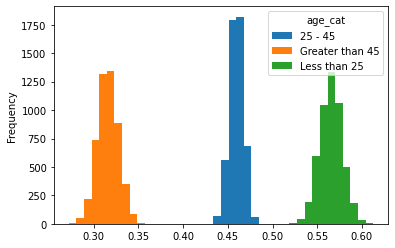

In [10]:
bs.plot.hist(bins=40)

In [11]:
params = pd.DataFrame({
    'N': data.groupby('age_cat').size(),
    'k': data.groupby('age_cat')['two_year_recid'].sum()})

In [12]:
params

,N,k
age_cat,,
25 - 45,4109,1889
Greater than 45,1576,498
Less than 25,1529,864


In [16]:
binomial = params.apply(
    lambda x: binom.rvs(x['N'], x['k']/x['N'], size=5000)/x['N'], axis=1, result_type='expand'
)

In [17]:
binomial

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
age_cat,,,,,,,,,,,,,,,,,,,,,
25 - 45,0.461426,0.456315,0.460939,0.455099,0.453638,0.466537,0.449501,0.455585,0.463860,0.459479,...,0.477488,0.468240,0.445364,0.444877,0.473595,0.469701,0.458992,0.449988,0.462156,0.452422
Greater than 45,0.323604,0.301396,0.291878,0.307107,0.303934,0.332487,0.329315,0.310914,0.319797,0.322335,...,0.354695,0.317259,0.288706,0.326777,0.352792,0.330584,0.326142,0.328680,0.310279,0.312183
Less than 25,0.584042,0.569653,0.560497,0.559189,0.574232,0.563767,0.559843,0.553303,0.564421,0.570307,...,0.553303,0.559843,0.581426,0.567691,0.568999,0.550687,0.584042,0.573578,0.567691,0.567691


<AxesSubplot:ylabel='Frequency'>

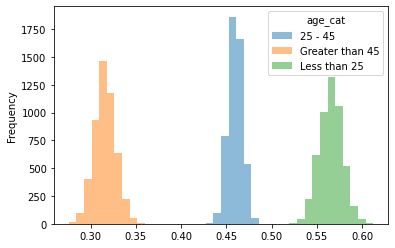

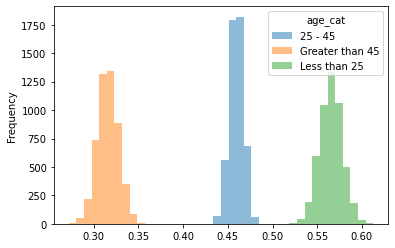

In [21]:
binomial.T.plot.hist(bins=40, alpha=0.5)
bs.plot.hist(bins=40, alpha=0.5)

## Model performance

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [23]:
Xtr, Xte, ytr, yte = train_test_split(data[['age_cat']], data['two_year_recid'], test_size=0.2)

In [24]:
ytr.groupby(Xtr['age_cat']).mean()

age_cat
25 - 45            0.462918
Greater than 45    0.306413
Less than 25       0.575534
Name: two_year_recid, dtype: float64

In [25]:
# threshold = 0.5
pred = Xte['age_cat'] == 'Less than 25'

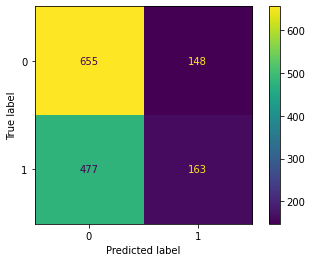

In [26]:
ConfusionMatrixDisplay(confusion_matrix(yte, pred)).plot()

In [27]:
X = pd.get_dummies(data[['age_cat', 'priors_count']])
y = data['two_year_recid']

In [29]:
import numpy
from sklearn.tree import DecisionTreeClassifier

In [30]:
# boostrap accuracy
# WARNING: If you need a validation set, it should be separated out before this!
accs = []
for _ in range(5000):
    idx = numpy.random.choice(len(y), len(y), True)
    Xtr, Xte, ytr, yte = train_test_split(X.iloc[idx], y.iloc[idx], test_size=0.2)
    model = DecisionTreeClassifier(max_depth=3).fit(Xtr, ytr)
    accs.append(accuracy_score(yte, model.predict(Xte)))

In [49]:
def hist(*a_vec, **kwargs):
    for a in a_vec:
        pd.Series(a).plot.hist(**kwargs)

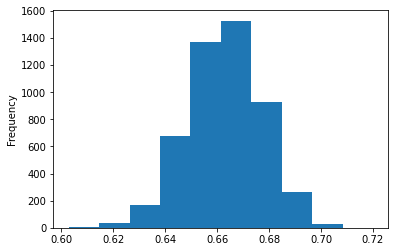

In [32]:
hist(accs)

## Predictions

In [36]:
features = ['age', 'juv_misd_count', 'priors_count']
X = data[features]
y = data['two_year_recid']

In [37]:
model = DecisionTreeClassifier(max_depth=5).fit(X, y)

In [41]:
model.predict_proba([[30, 3, 0]])[0][0]

/Users/dirk/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.716304347826087

In [39]:
models = []
for _ in range(5000):
    idx = numpy.random.choice(len(y), len(y), True)
    models.append(DecisionTreeClassifier(max_depth=5).fit(X.iloc[idx], y.iloc[idx]))

In [43]:
import warnings

In [47]:
warnings.filterwarnings('ignore')

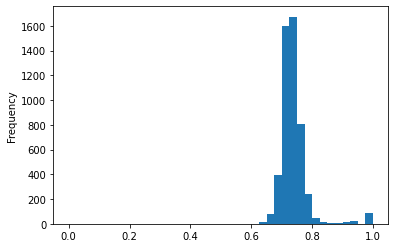

In [50]:
hist([m.predict_proba([[30, 3, 0]])[0][0] for m in models], bins=40)

## Cross-validation

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [59]:
cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=5), X, y, cv=50)

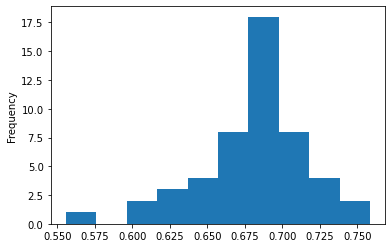

In [60]:
hist(cv_scores, bins=10)

In [61]:
# Note: Re-run the above several times, it won't change, no randomness

## Stratified K-Fold

In [62]:
from sklearn.model_selection import StratifiedKFold, KFold

In [64]:
cv_scores_strat = cross_val_score(DecisionTreeClassifier(max_depth=5),
                                  X, y, cv=StratifiedKFold(n_splits=50))

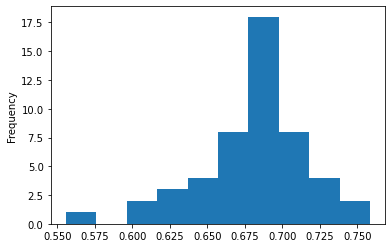

In [65]:
hist(cv_scores_strat)

In [66]:
# stratified is the default behaviour

In [67]:
cv_scores_non_strat = cross_val_score(DecisionTreeClassifier(max_depth=5),
                                  X, y, cv=KFold(n_splits=50))

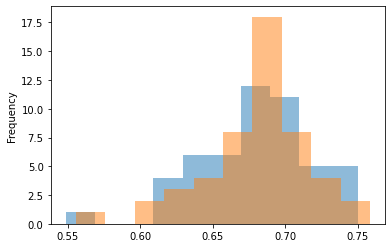

In [69]:
hist(cv_scores_non_strat, cv_scores_strat, alpha=0.5)

## Leave-one-out

In [70]:
from sklearn.model_selection import LeaveOneOut

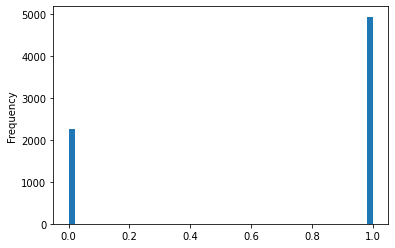

In [71]:
hist(
    cross_val_score(DecisionTreeClassifier(max_depth=5),
                                  X, y, cv=LeaveOneOut()), bins=50)

In [72]:
loo = cross_val_score(DecisionTreeClassifier(max_depth=5),
                                  X, y, cv=LeaveOneOut())

In [73]:
from scipy.stats import binom

In [74]:
k, n = loo.sum(), loo.shape[0]

In [77]:
xs = numpy.linspace(0.65, 0.75, 300)

<AxesSubplot:>

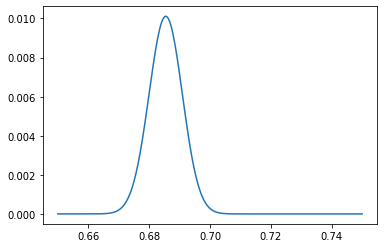

In [78]:
pd.Series(binom.pmf(k=k, n=n, p=xs), index=xs).plot.line()

In [79]:
# that's probably wrong because the assumtion of a binomial distribuiton is wrong